In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.tree import plot_tree

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')


In [2]:
#Data reading 
Phy_Che = pd.read_pickle('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_qt.pkl')
display(Phy_Che)

,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Aquatic_500.t,Cropland_500.t,Forest_500.t,Pastures.and.open.nature_500.t,Urban_500.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,Spring,6.355,...,-0.635657,-0.402250,0.910612,-0.067940,-0.654950,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,Spring,6.305,...,0.849086,-0.459558,1.063622,-0.346234,0.579132,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,Spring,6.005,...,-0.635657,0.357345,0.357345,-0.036563,-0.183805,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,Spring,7.195,...,1.120502,-0.152026,0.413601,0.459558,0.078412,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,Spring,5.900,...,-0.635657,-0.026114,0.269558,0.591528,-0.554602,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,-54.749753,-34.383481,Valle del Cordillera,Uruguay,1,1,Spring,7.880,...,-0.635657,-1.731664,-0.776422,1.665398,-1.150349,0.000000,0.000000,-0.822105,1.665398,0.000000
237,URG027,VCL3,-54.747753,-34.384983,Valle del Cordillera,Uruguay,1,1,Spring,7.800,...,-0.635657,-1.731664,-0.194437,1.343325,-1.150349,0.000000,0.000000,-0.219486,1.343325,0.000000
238,URG028,VCH1,-54.759703,-34.383453,Valle del Cordillera,Uruguay,1,1,Spring,9.610,...,-0.635657,-0.335166,-1.181259,1.369531,-0.390951,0.000000,-0.491989,-1.260117,1.369531,-1.123769
239,URG029,VCH2,-54.767964,-34.379486,Valle del Cordillera,Uruguay,1,1,Spring,8.470,...,-0.635657,-0.324138,-0.604016,1.140287,-1.150349,0.000000,-0.479169,-0.641518,1.140287,0.000000


In [3]:
Phy_Che.columns

Index(['Pond_ID', 'PondCode', 'X', 'Y', 'Pondscape', 'Country', 'Strat_Survey',
       'Resampling', 'season_col', 'pH', 'O2_con', 'O2_sat', 'Turb', 'Sludge',
       'Snel', 'Cond', 'T', 'TN', 'TP', 'DOC', 'TOC', 'CHLa', 'PC',
       'Sulphates', 'Chlorides', 'Alkalinity', 'Ca', 'Mg', 'Na', 'K', 'TSS',
       'N.NO3', 'P.PO4', 'N.NH4', 'N.NO2', 'CHLa_Spectro', 'N.NO23', 'Fe',
       'Secchi_Depth', 'CHLa_RFU', 'PC_RFU', 'TDN', 'OM', 'year',
       'Hydeoperiod_length', 'bio1', 'bio4', 'bio5', 'bio6', 'bio7', 'bio12',
       'bio15', 'bio17', 'Nat_res', 'Area', 'Depth', 'Pond_dries',
       'Rel_waterlev', 'PVI', 'Animals_cont', 'lifestockQ', 'Natural_5',
       'Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500', 'Urban_500', 'ECELS', 'bio1.t',
       'bio4.t', 'bio5.t', 'bio6.t', 'bio7.t', 'bio12.t', 'bio15.t', 'bio17.t',
       'Area.t', 'Depth.t', 'Animals_cont.t', 'Hydeoperiod_length.t',
       'ECELS.t', 'Natural_5.t', 'Aquatic_500.t', 'Cropland_500.

In [4]:
vars=['Pond_ID', 'PondCode', 'Pondscape', 'Country', 'Strat_Survey',
       'Resampling', 'season_col','Area', 'Depth','TN', 'TP','bio1', 'bio4', 'bio5','bio12','Hydeoperiod_length',
       'Animals_cont', 'Natural_5','Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500','Urban_500']
Phy_Che_random_forest_df = Phy_Che[vars]
display(Phy_Che_random_forest_df)

,Pond_ID,PondCode,Pondscape,Country,Strat_Survey,Resampling,season_col,Area,Depth,TN,...,bio5,bio12,Hydeoperiod_length,Animals_cont,Natural_5,Aquatic_500,Cropland_500,Forest_500,Pastures.and.open.nature_500,Urban_500
1,BE048,AW1_NA1,Antwerp,Belgium,1,0,Spring,702.000,50.00,1.30,...,23.514313,867.2400,12.0,2,2.0,0.000000,0.087143,0.638828,0.273897,0.000132
2,BE049,AW1_IN2,Antwerp,Belgium,1,0,Spring,336.000,56.88,3.20,...,23.489197,867.2400,12.0,2,70.0,0.006009,0.075277,0.711569,0.192221,0.014923
3,BE050,AW1_EX1,Antwerp,Belgium,1,0,Spring,882.000,38.57,1.85,...,23.488373,867.2400,12.0,2,80.0,0.000000,0.378715,0.341746,0.277891,0.001647
4,BE051,AW1_NA2,Antwerp,Belgium,1,0,Spring,180.000,32.50,3.60,...,23.399719,870.3936,12.0,2,0.0,0.027829,0.170470,0.353205,0.443551,0.004946
5,BE052,AW1_IN1,Antwerp,Belgium,1,0,Spring,4250.000,28.50,2.65,...,23.494171,867.2400,12.0,2,57.0,0.000000,0.208907,0.300152,0.490612,0.000329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,Valle del Cordillera,Uruguay,1,1,Spring,310.235,107.00,0.58,...,27.547333,1198.3680,12.0,3,0.0,0.000000,0.000000,0.072353,0.927647,0.000000
237,URG027,VCL3,Valle del Cordillera,Uruguay,1,1,Spring,84.830,91.00,0.56,...,27.547333,1198.3680,12.0,3,2.0,0.000000,0.000000,0.150056,0.849944,0.000000
238,URG028,VCH1,Valle del Cordillera,Uruguay,1,1,Spring,2591.940,101.00,2.00,...,27.547333,1198.3680,12.0,4,0.0,0.000000,0.119596,0.028243,0.851552,0.000610
239,URG029,VCH2,Valle del Cordillera,Uruguay,1,1,Spring,362.905,67.50,1.05,...,27.547333,1198.3680,12.0,4,0.0,0.000000,0.124294,0.089898,0.785807,0.000000


In [5]:
#UK lancaster has NA values for both TP and TP
Phy_Che_random_forest_df.dropna(inplace=True)
display(Phy_Che_random_forest_df)

,Pond_ID,PondCode,Pondscape,Country,Strat_Survey,Resampling,season_col,Area,Depth,TN,...,bio5,bio12,Hydeoperiod_length,Animals_cont,Natural_5,Aquatic_500,Cropland_500,Forest_500,Pastures.and.open.nature_500,Urban_500
1,BE048,AW1_NA1,Antwerp,Belgium,1,0,Spring,702.000,50.00,1.30,...,23.514313,867.2400,12.0,2,2.0,0.000000,0.087143,0.638828,0.273897,0.000132
2,BE049,AW1_IN2,Antwerp,Belgium,1,0,Spring,336.000,56.88,3.20,...,23.489197,867.2400,12.0,2,70.0,0.006009,0.075277,0.711569,0.192221,0.014923
3,BE050,AW1_EX1,Antwerp,Belgium,1,0,Spring,882.000,38.57,1.85,...,23.488373,867.2400,12.0,2,80.0,0.000000,0.378715,0.341746,0.277891,0.001647
4,BE051,AW1_NA2,Antwerp,Belgium,1,0,Spring,180.000,32.50,3.60,...,23.399719,870.3936,12.0,2,0.0,0.027829,0.170470,0.353205,0.443551,0.004946
5,BE052,AW1_IN1,Antwerp,Belgium,1,0,Spring,4250.000,28.50,2.65,...,23.494171,867.2400,12.0,2,57.0,0.000000,0.208907,0.300152,0.490612,0.000329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,Valle del Cordillera,Uruguay,1,1,Spring,310.235,107.00,0.58,...,27.547333,1198.3680,12.0,3,0.0,0.000000,0.000000,0.072353,0.927647,0.000000
237,URG027,VCL3,Valle del Cordillera,Uruguay,1,1,Spring,84.830,91.00,0.56,...,27.547333,1198.3680,12.0,3,2.0,0.000000,0.000000,0.150056,0.849944,0.000000
238,URG028,VCH1,Valle del Cordillera,Uruguay,1,1,Spring,2591.940,101.00,2.00,...,27.547333,1198.3680,12.0,4,0.0,0.000000,0.119596,0.028243,0.851552,0.000610
239,URG029,VCH2,Valle del Cordillera,Uruguay,1,1,Spring,362.905,67.50,1.05,...,27.547333,1198.3680,12.0,4,0.0,0.000000,0.124294,0.089898,0.785807,0.000000


TP

In [6]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area', 'Depth','bio1', 'bio4', 'bio5','bio12','Hydeoperiod_length',
       'Animals_cont', 'Natural_5','Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500','Urban_500']]

y = Phy_Che_random_forest_df['TP']


In [7]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True,max_depth=4)
#ccp_alpha=0.01)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=4, n_estimators=10, oob_score=True,
                      random_state=0)

In [9]:


# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: -0.3641497518226835
Mean Squared Error: 0.09005420711053087
R-squared: 0.6426936845133537


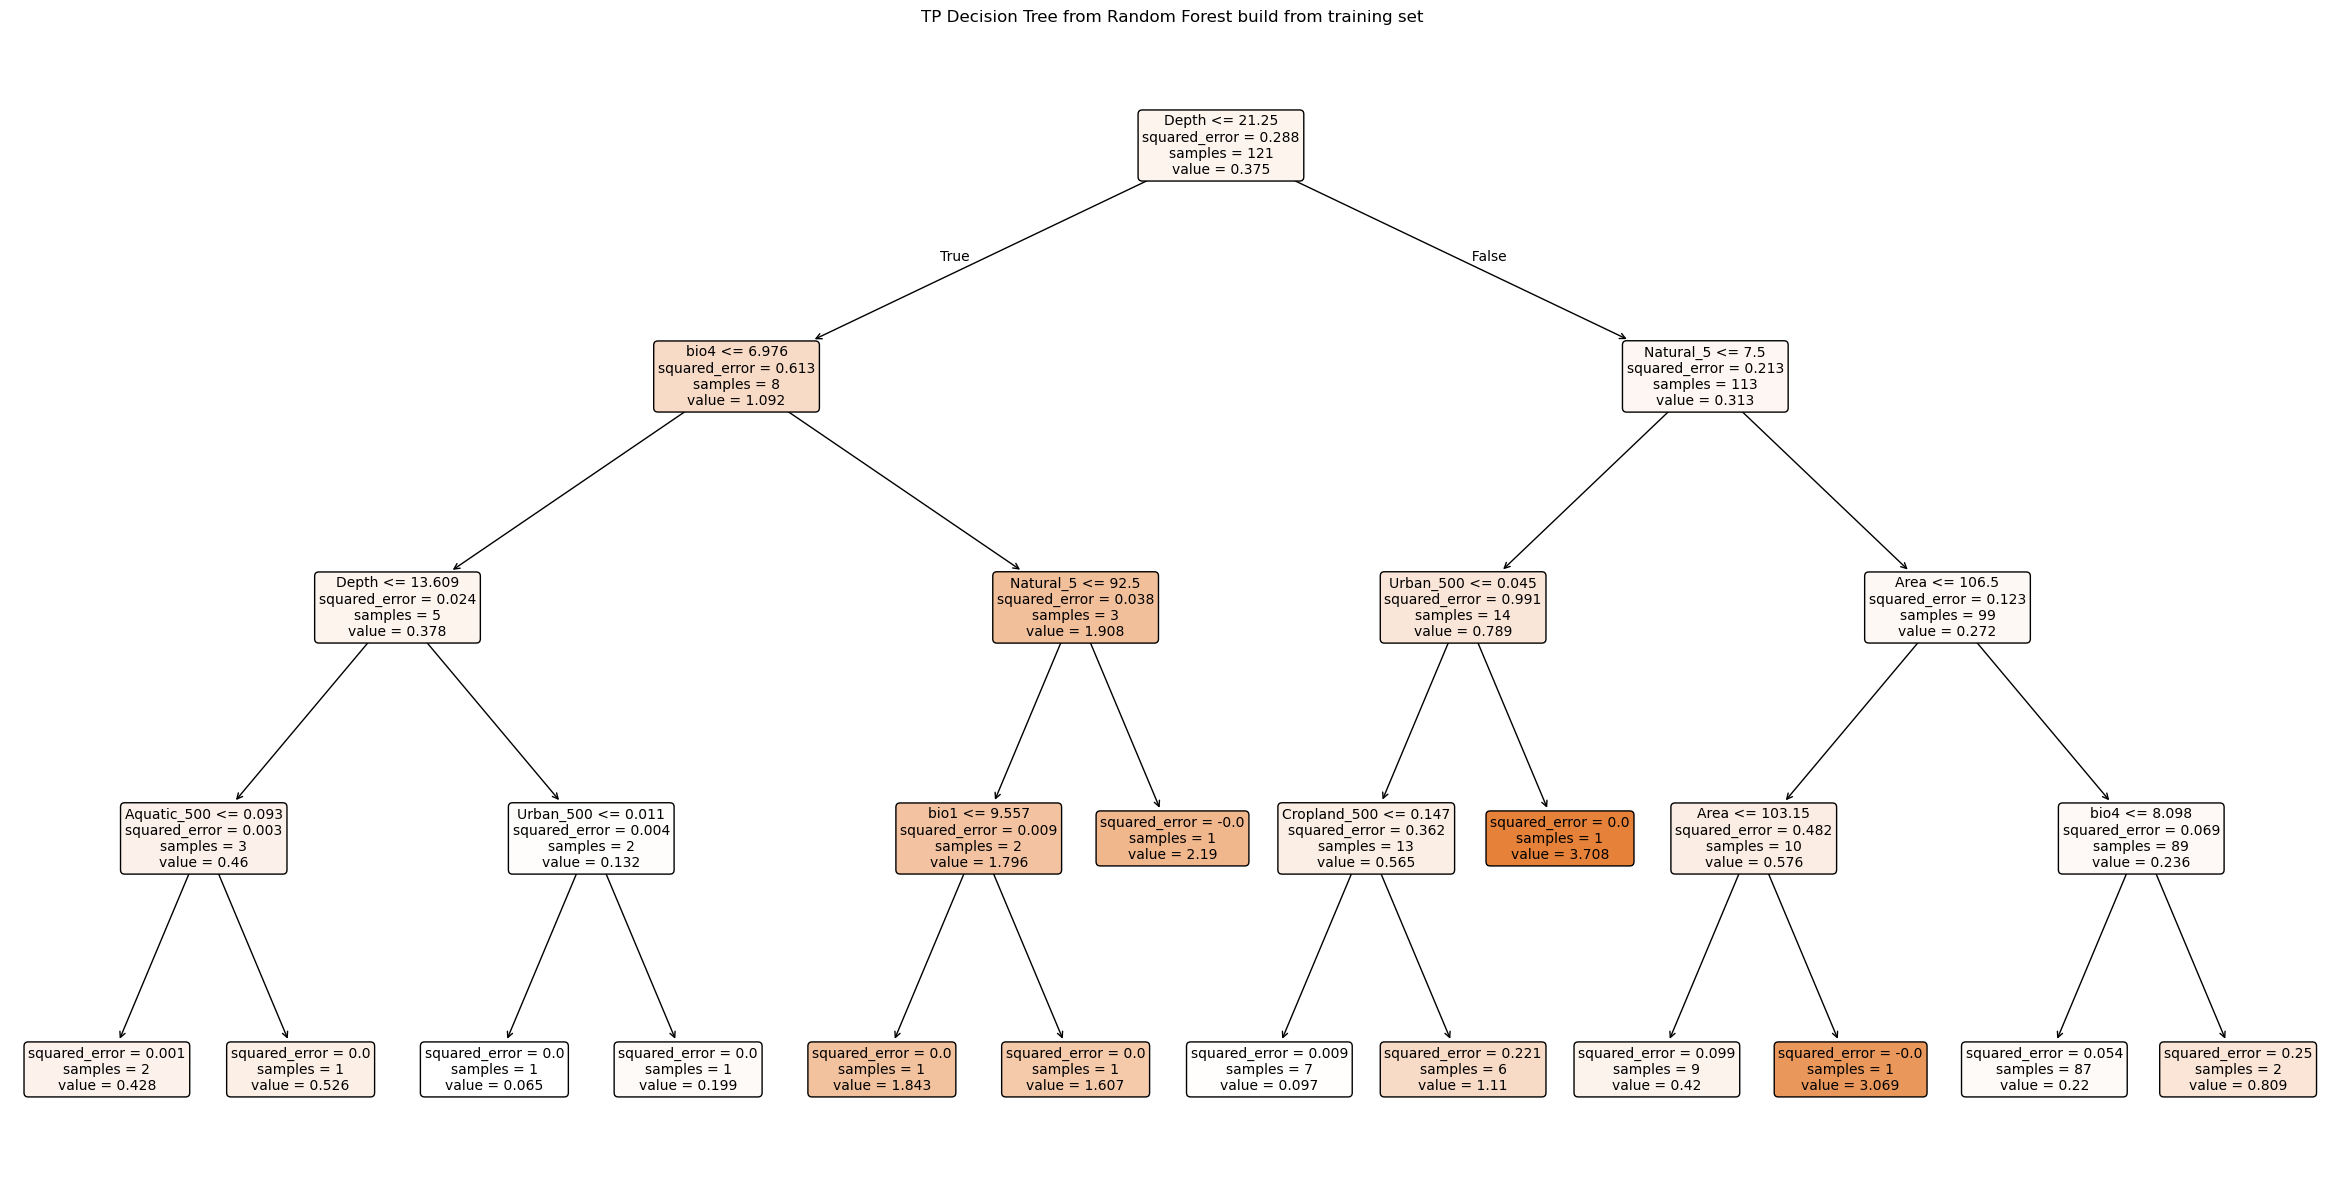

In [10]:


# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(30,15))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("TP Decision Tree from Random Forest build from training set")
plt.show()


### TN 

In [17]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area', 'Depth','bio1', 'bio4', 'bio5','bio12','Hydeoperiod_length',
       'Animals_cont', 'Natural_5','Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500','Urban_500']]

y = Phy_Che_random_forest_df['TN']


In [18]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
#ccp_alpha=0.01)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [20]:


# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: -0.055226023589277196
Mean Squared Error: 0.37899910894607847
R-squared: 0.7967010648672965


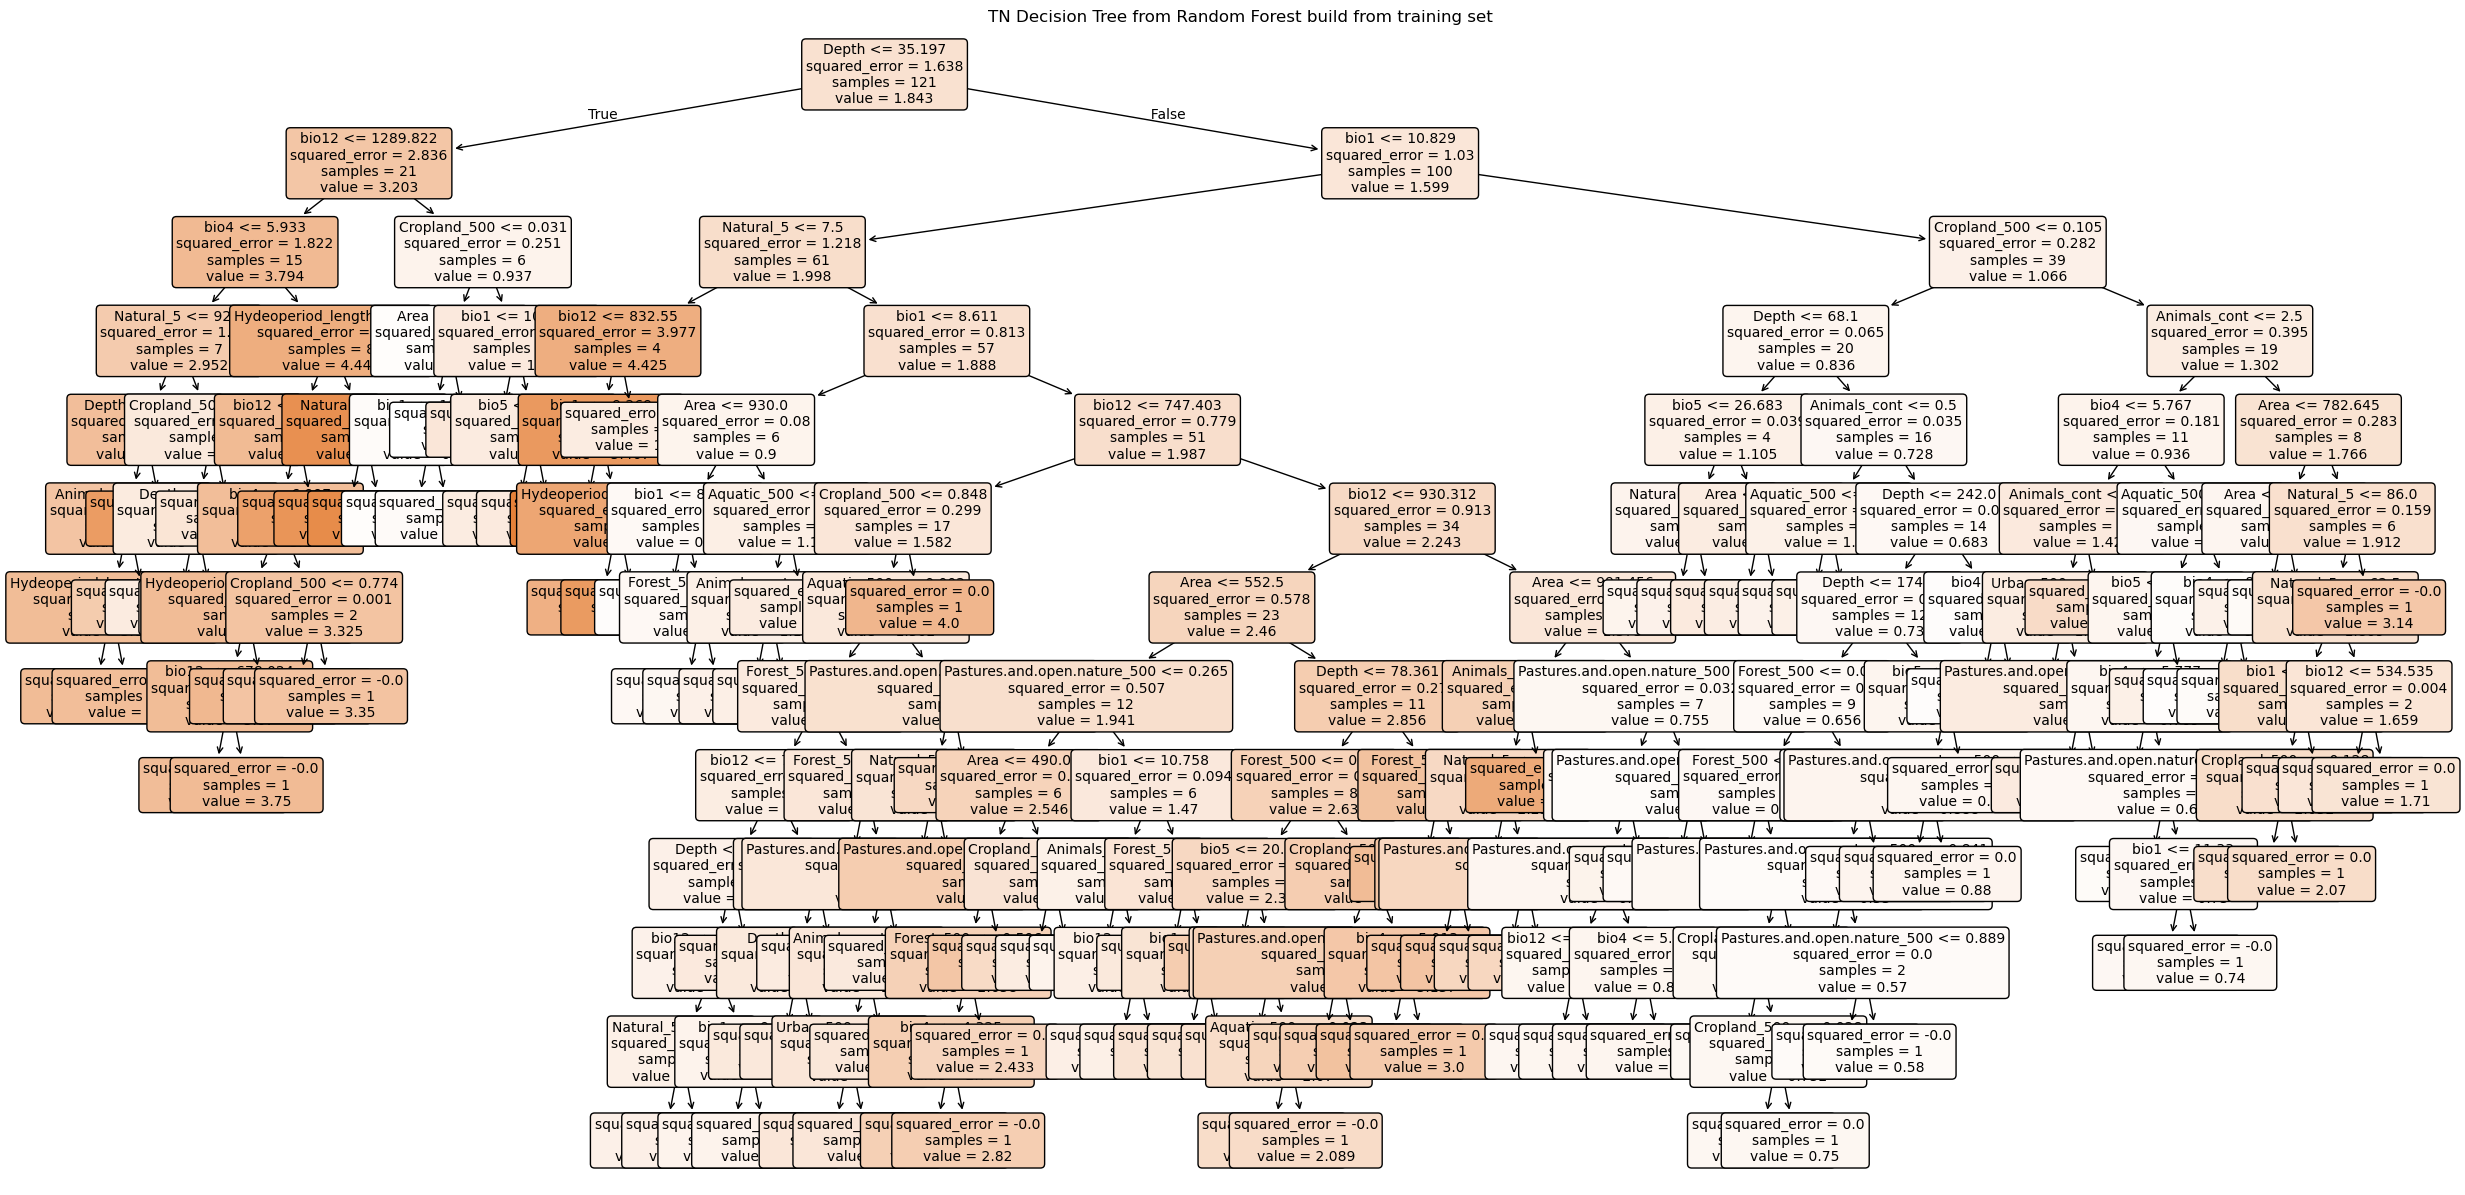

In [21]:


# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(30,15))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("TN Decision Tree from Random Forest build from training set")
plt.show()


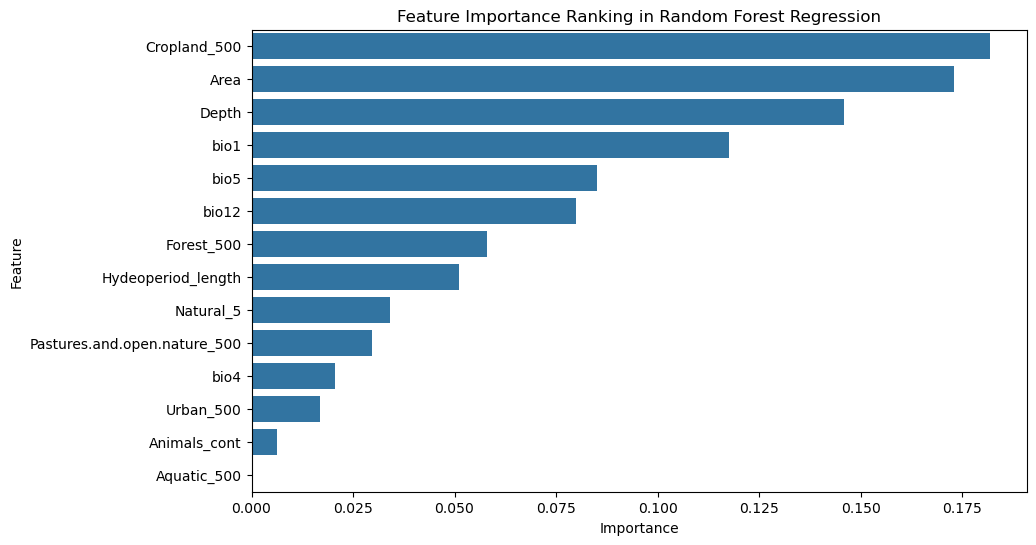

Mean Squared Error on Test Set: 0.89


In [16]:
importances = regressor.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance Ranking in Random Forest Regression')
plt.show()

# Predict on the test set and evaluate performance
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")